## Data Visualization: Pokémon Type Rankings and Vessel Trajectories

### Problem 1

#### Goal: Create interactive bar plot to that displays the top five Pokemon based on Type and Stat

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact
import ipywidgets as widgets 
import numpy as np
from IPython.display import Image

In [19]:
pg = Image(url = "Pokemon Graph.png")
st = Image(url = "Ship Trajectories.png")

In [2]:
# Reading in our data and creating a data frame
data = pd.read_excel('pokemon copy.xlsx')
df = pd.DataFrame(data)

# Creating our columns for Type and Stats
distinctType = df['Type'].drop_duplicates()
stat = df.columns[4:]

In [3]:
# Found the actual colors of each Pokemon type on GitHub
colors = {
'NORMAL': '#A8A77A',
'FIRE': '#EE8130',
'WATER': '#6390F0',
'ELECTRIC': '#F7D02C',
'GRASS': '#7AC74C',
'ICE': '#96D9D6',
'FIGHTING': '#C22E28',
'POISON': '#A33EA1',
'GROUND': '#E2BF65',
'FLYING': '#A98FF3',
'PSYCHIC': '#F95587',
'BUG': '#A6B91A',
'ROCK': '#B6A136',
'GHOST': '#735797',
'DRAGON': '#6F35FC',
'DARK': '#705746',
'STEEL': '#B7B7CE',
'FAIRY': '#D685AD',
}

In [4]:
# Define function that outputs the top five Pokemon taking in Type and Stat as inputs (use with widgets)
def top5(pType, pStat):
    fig, ax = plt.subplots(figsize=(10,6))
    
    filtered = df[df['Type'].str.contains(pType)]
    
    top = filtered.sort_values(by = pStat, ascending = False).head(5)
    
    plt.title("Top 5 Pokemon based on Type and Stats")
    ax.set_xlabel('Pokemon')
    ax.set_ylabel(f'{pStat}')
    ax.bar(top['Name'], top[pStat], color = colors[pType])
    plt.show()

In [5]:
typewidg = widgets.Dropdown(
    options=distinctType,
    description='Type:',
    disabled=False,
)

statwidg = widgets.Dropdown(
    options = stat,
    description='Stats:',
    disabled=False,
)

In [6]:
interactivePlot = interactive(top5, pType = typewidg, pStat = statwidg)

display(interactivePlot)

interactive(children=(Dropdown(description='Type:', options=('GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'W…

In [20]:
pg

### Problem 2

#### Goal: Analyze marine vessels trajectories through their movement to calculate speed and direction

In [7]:
ship = pd.read_csv('shipTrajectories.csv')
df = pd.DataFrame(ship)
df

,Index,MMSI,Latitude,Longitude,Time
0,1,462803135,109.156070,19.789421,6/2/2019 5:44
1,2,462803135,109.151550,19.791151,6/2/2019 5:58
2,3,462803135,109.149640,19.791980,6/2/2019 6:00
3,4,462803135,109.146996,19.794230,6/2/2019 6:02
4,5,462803135,109.145730,19.795967,6/2/2019 6:04
...,...,...,...,...,...
108701,108702,477154100,119.201256,37.264965,6/8/2019 18:52
108702,108703,477154100,119.212960,37.273590,6/8/2019 18:56
108703,108704,477154100,119.218640,37.277576,6/8/2019 18:58
108704,108705,477154100,119.223870,37.281345,6/8/2019 19:00


In [8]:
# Identify each ship individually
ships = df['MMSI'].unique()
ships

array([462803135, 462804209, 462810245, 462812010, 463042101, 464646466,
       466000005, 466613223, 469532158, 469762817, 470208017, 472396009,
       477001400, 477001800, 477002300, 477003200, 477003600, 477004300,
       477006600, 477010500, 477010600, 477013300, 477013700, 477014400,
       477014600, 477014700, 477016200, 477016300, 477016800, 477017400,
       477021300, 477021800, 477023600, 477024600, 477024800, 477024900,
       477027100, 477036300, 477036500, 477040800, 477043400, 477043800,
       477045100, 477047100, 477049700, 477050200, 477056100, 477057200,
       477065500, 477066600, 477067400, 477067800, 477071600, 477077100,
       477077500, 477077600, 477078600, 477078900, 477079500, 477080300,
       477081100, 477083300, 477089200, 477089300, 477091300, 477091500,
       477091800, 477096300, 477098300, 477098900, 477100600, 477102400,
       477105400, 477105800, 477107900, 477108200, 477108600, 477109500,
       477109800, 477110100, 477110800, 477111700, 

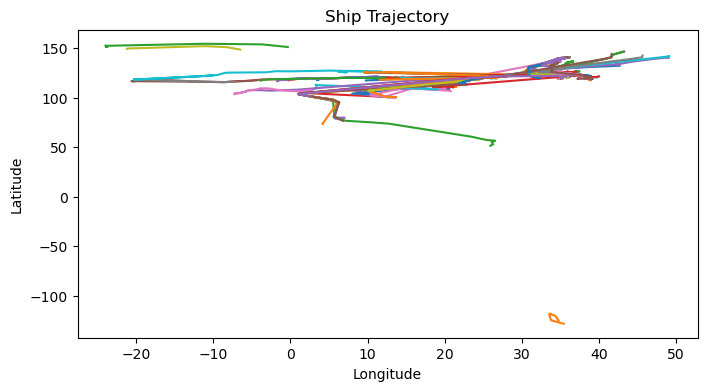

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

# Plot each ships position
for ship in ships:
    current = df[df['MMSI'] == ship]
    
    shipx = current['Longitude']
    shipy = current['Latitude']
    
    ax.plot(shipx, shipy) #label = f'{ship}' Messed up plot when legend is added
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Ship Trajectory')

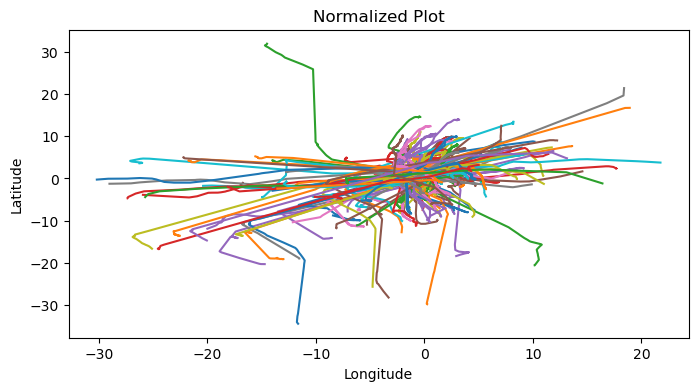

In [10]:
fig, ax = plt.subplots(figsize=(8,4))

# Similar logic, but normalization is applied before each ship is plotted
for ship in ships:
    current = df[df['MMSI'] == ship]
    
    xavg = current['Longitude'].mean()
    yavg = current['Latitude'].mean()
    
    x_norm = current['Longitude'] - xavg
    y_norm = current['Latitude'] - yavg
    
    ax.plot(x_norm, y_norm) #label = f'{ship}' Messed up plot when legend is added
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.title('Normalized Plot')

In [12]:
# Convert the 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

grouped = df.groupby('MMSI')

dx = grouped['Longitude'].diff()
dy = grouped['Latitude'].diff()
dist = np.sqrt(dx**2 + dy**2)

# Time difference in seconds
dt = grouped['Time'].diff().dt.total_seconds()

# Speed = Distance / Time
df['speed'] = dist / dt

# Direction = arctan2(dx, dy) in degrees
df['direction'] = np.arctan2(dx, dy) * (180 / np.pi)

In [13]:
# Defines function that allows user to choose a ship and it will display its speed and direction
def histogram(ship):
    ship_num = df[df['MMSI'] == ship]
    
    fig, ax = plt.subplots(nrows = 2, figsize = (10,7))
    plt.subplots_adjust(hspace = 0.4)
    
    ax[0].hist(ship_num['speed'])
    ax[0].set_title(f'Ship {ship} Speed')
    ax[0].set_xlabel('Speed (knots)')
    ax[0].set_ylabel('Count')
    
    ax[1].hist(ship_num['direction'])
    ax[1].set_title(f'Ship {ship} Direction') 
    ax[1].set_xlabel('Direction (degrees)')
    ax[1].set_ylabel('Count')

In [14]:
shipwidg = widgets.Dropdown(
    options=ships,
    description='Ships:',
)

In [15]:
interactivePlt = interact(histogram, ship = shipwidg)

interactive(children=(Dropdown(description='Ships:', options=(np.int64(462803135), np.int64(462804209), np.int…

In [21]:
st

### References

apaleslimghost. (n.d.). Pokémon Type Colors Gist. GitHub Gist. Retrieved from https://gist.github.com/apaleslimghost/0d25ec801ca4fc43317bcff298af43c3

OpenAI ChatGPT. (2024). Assistance with data normalization. Retrieved from https://chatgpt.com/share/67eddbba-52f0-8005-8c57-84a74643d570

Movable Type Scripts. (n.d.). Calculate distance, bearing, and more between latitude/longitude points. Retrieved from https://www.movable-type.co.uk/scripts/latlong.html